## Observations and Insights 

In [93]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='left')
merge_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.
merge_data['Mouse ID'].value_counts().head()

g989    13
a963    10
r554    10
a444    10
s185    10
Name: Mouse ID, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_results_mice = study_results_single.set_index['Mouse ID']['Timepoint']
mouse = study_results_mice.loc['g989',:]
mouse.head()

NameError: name 'study_results_single' is not defined

In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 


In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [ ]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = merge_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
median = merge_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = merge_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdv = merge_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = merge_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_df = pd.DataFrame({"Mean": mean,
                           "Median": median,
                           "Variance": variance,
                           "Standard Deviation": stdv,
                           "SEM": sem})
summary_df



# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

## Bar Plots

In [5]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
bar_df = pd.DataFrame(merge_data.groupby(['Drug Regimen']).count()).reset_index()

regimen_data = bar_df[["Drug Regimen", "Mouse ID"]]
regimen_data = regimen_data.rename(columns={'Mouse ID': "Count"})

regimen_data = regimen_data.set_index("Drug Regimen")





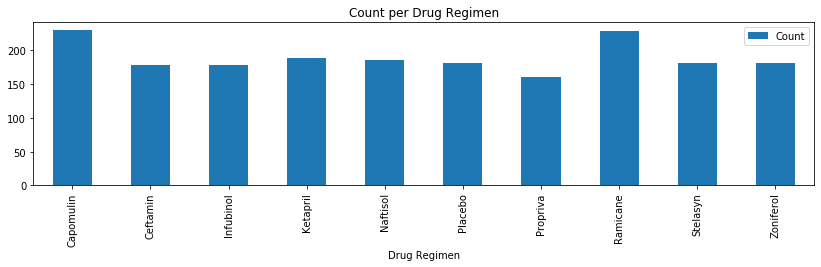

<Figure size 432x288 with 0 Axes>

In [6]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
regimen_data.plot(kind='bar', figsize=(14,3))

plt.title("Count per Drug Regimen")


plt.show()
plt.tight_layout()






## Pie Plots

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_data = pd.DataFrame(merge_data.groupby(['Sex']).count()).reset_index()
gender_data.head() 


,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [10]:
gender_data = gender_data[['Sex', 'Mouse ID']]
gender_data = gender_data.rename(columns={'Mouse ID': 'Count'})
gender_data.head()

,Sex,Count
0,Female,935
1,Male,958


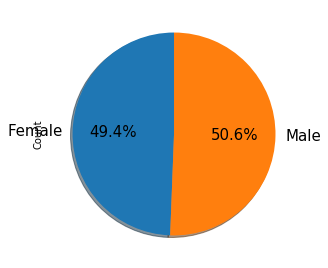

In [11]:
plt.figure(figsize=(10,6))
axl = plt.subplot(121, aspect = 'equal')
gender_data.plot(kind = 'pie', y = "Count", ax = axl, autopct = "%1.1f%%", startangle = 90, shadow = True, labels = gender_data['Sex'], legend = False, fontsize=15)



([<matplotlib.patches.Wedge at 0x1a19bf0a50>,
 [Text(-1.0997996703027118, 0.02099250347258563, 'Females'),
  Text(1.0997996703027118, -0.020992503472586254, 'Males')],
 [Text(-0.5998907292560246, 0.01145045643959216, '49.4%'),
  Text(0.5998907292560246, -0.0114504564395925, '50.6%')])

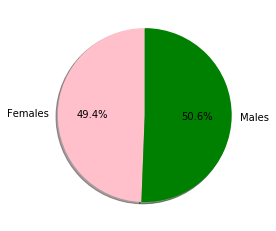

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_vs = (merge_data.groupby(['Sex'])['Age_months'].count()).tolist()
gender_vs

labels = ['Females', 'Males']
colors = ["pink", "green"]

plt.pie(gender_vs, labels = labels, colors = colors, autopct="%1.1f%%", shadow = True, startangle=90)





TypeError: pie() got an unexpected keyword argument 'label'

## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
treatment_df = merge_data.sort_values(['Drug Regimen', 'Mouse ID', 'Timepoint'])

final_df = treatment_df.loc[treatment_df['Timepoint']==45]
final_df.head()

#4 regimens of interest are : Ceftamin, Ramicane, Capomulin, Infubinole

#4 separate plots


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
309,b128,Capomulin,Female,9,22,45,38.982878,2
299,b742,Capomulin,Male,7,21,45,38.939633,0
244,g288,Capomulin,Male,3,19,45,37.074024,1
360,g316,Capomulin,Female,22,22,45,40.159220,2
440,i557,Capomulin,Female,1,24,45,47.685963,1


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

In [37]:
#Ceftamin table & outliers
ceft_df = final_df[final_df['Drug Regimen'].isin(['Ceftamin'])]
ceft_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
493,a275,Ceftamin,Female,20,28,45,62.999356,3
993,j296,Ceftamin,Female,24,30,45,61.849023,3
1033,k210,Ceftamin,Male,15,28,45,68.923185,3
1112,l471,Ceftamin,Female,7,28,45,67.748662,1
1132,l661,Ceftamin,Male,18,26,45,59.851956,3


In [39]:
ceft_data = ceft_df.sort_values(["Tumor Volume (mm3)"])
ceft_data = ceft_data['Tumor Volume (mm3)']
ceft_data

1260    59.741901
1132    59.851956
1797    61.386660
1379    61.433892
993     61.849023
493     62.999356
1162    64.299830
1773    64.634949
1855    64.729837
1670    67.527482
1112    67.748662
1845    68.594745
1033    68.923185
Name: Tumor Volume (mm3), dtype: float64

In [43]:
quartiles = ceft_data.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq= quartiles[0.75]
iqr = upperq - lowerq

print(f'The lower quartile is: {lowerq}')
print(f'The upper quartile is: {upperq}')
print(f'The interquartile range is: {iqr}')
print(f"The median is: {quartiles[0.5]}")

low_bound = lowerq - (1.5*iqr)
high_bound = upperq + (1.5*iqr)
print(f"{low_bound} and below could be outliers")
print(f"{high_bound} and above could be outliers")

The lower quartile is: 61.43389223
The upper quartile is: 67.52748237
The interquartile range is: 6.093590140000003
The median is: 64.29983003
52.29350701999999 and below could be outliers
76.66786758 and above could be outliers


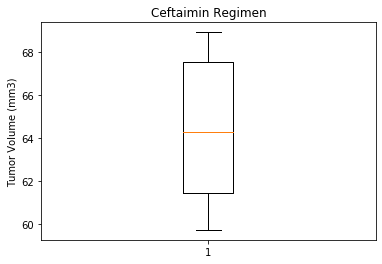

In [44]:
figl, axl = plt.subplots()
axl.set_title('Ceftaimin Regimen')
axl.set_ylabel('Tumor Volume (mm3)')
axl.boxplot(ceft_data)
plt.show()

In [46]:
#Ramicane table & outliers
rami_df = final_df[final_df["Drug Regimen"].isin(['Ramicane'])]
rami_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
327,a411,Ramicane,Male,3,22,45,38.407618,1
430,a444,Ramicane,Female,10,25,45,43.047543,0
214,a520,Ramicane,Male,13,21,45,38.810366,1
174,a644,Ramicane,Female,7,17,45,32.978522,1
154,c758,Ramicane,Male,9,17,45,33.397653,1


In [47]:
rami_data = rami_df.sort_values(["Tumor Volume (mm3)"])
rami_data = rami_data["Tumor Volume (mm3)"]
rami_data

9      22.050126
49     29.128472
59     30.276232
74     30.564625
84     30.638696
114    31.095335
94     31.560470
174    32.978522
154    33.397653
184    33.562402
194    36.134852
254    36.374510
234    37.225650
272    37.311236
327    38.407618
214    38.810366
400    40.659006
410    40.667713
430    43.047543
420    45.220869
Name: Tumor Volume (mm3), dtype: float64

In [48]:
quartiles = rami_data.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile is: {iqr}")
print(f"The median is: {quartiles[0.5]}")

low_bound = lowerq - (1.5*iqr)
high_bound = upperq + (1.5*iqr)
print(f"{low_bound} and below could be outliers")
print(f"{high_bound} and above could be outliers")


The lower quartile is: 30.981175224999998
The upper quartile is: 38.508305307499995
The interquartile is: 7.527130082499998
The median is: 34.848627300000004
19.690480101250003 and below could be outliers
49.79900043124999 and above could be outliers


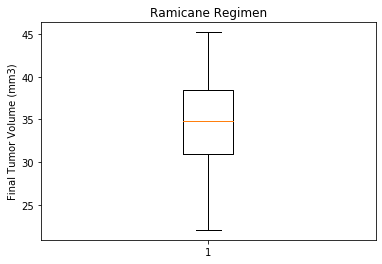

In [49]:
#table
figl, axl = plt.subplots()
axl.set_title("Ramicane Regimen")
axl.set_ylabel("Final Tumor Volume (mm3)")
axl.boxplot(rami_data)
plt.show()

In [53]:
#Capomulin
capo_df = final_df[final_df["Drug Regimen"].isin(["Capomulin"])]
capo_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
309,b128,Capomulin,Female,9,22,45,38.982878,2
299,b742,Capomulin,Male,7,21,45,38.939633,0
244,g288,Capomulin,Male,3,19,45,37.074024,1
360,g316,Capomulin,Female,22,22,45,40.159220,2
440,i557,Capomulin,Female,1,24,45,47.685963,1


In [55]:
capo_data = capo_df.sort_values(['Tumor Volume (mm3)'])
capo_data = capo_data["Tumor Volume (mm3)"]
capo_data

19     23.343598
39     28.430964
29     28.484033
104    31.023923
124    31.896238
134    32.377357
144    33.329098
164    34.455298
224    36.041047
244    37.074024
204    37.311846
337    38.125164
282    38.846876
299    38.939633
309    38.982878
360    40.159220
350    40.658124
370    40.728578
380    41.483008
390    41.581521
440    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [60]:
quartiles = capo_data.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq= quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The median is: {quartiles[0.5]}")

low_bound = lowerq - (1.5*iqr)
high_bound = upperq + (1.5*iqr)

print(f"{low_bound} and below could be outliers")
print(f"{high_bound} and below could be outliers")


The lower quartile is: 32.37735684
The upper quartile is: 40.1592203
The interquartile range is: 7.781863460000004
The median is: 37.31184577
20.70456164999999 and below could be outliers
51.83201549 and below could be outliers


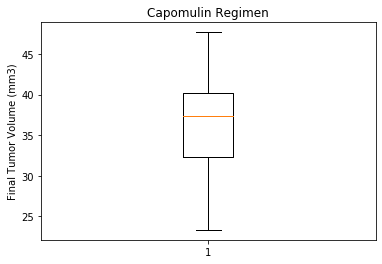

In [61]:
#table
figl, axl = plt.subplots()
axl.set_title("Capomulin Regimen")
axl.set_ylabel("Final Tumor Volume (mm3)")
axl.boxplot(capo_data)
plt.show()

In [62]:
#infubinole
infu_df = final_df[final_df["Drug Regimen"].isin(["Infubinol"])]
infu_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
540,a685,Infubinol,Male,8,30,45,66.083066,3
637,c139,Infubinol,Male,11,28,45,72.226731,2
800,e476,Infubinol,Male,23,26,45,62.435404,1


In [64]:
infu_data = infu_df.sort_values(["Tumor Volume (mm3)"])
infu_data = infu_data["Tumor Volume (mm3)"]
infu_data

834     60.918767
800     62.435404
1872    62.754451
473     65.525743
540     66.083066
1053    66.196912
1813    67.685569
463     67.973419
637     72.226731
Name: Tumor Volume (mm3), dtype: float64

In [66]:
quartiles = infu_data.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The median is {quartiles[0.5]}")

low_bound = lowerq - (1.5*iqr)
high_bound = upperq + (1.5*iqr)

print(f"{low_bound} and below could be outliers")
print(f"{high_bound} and below could be outliers")


The lower quartile is: 62.75445141
The upper quartile is: 67.68556862
The interquartile range is: 4.9311172099999965
The median is 66.08306589
55.35777559500001 and below could be outliers
75.08224443499999 and below could be outliers


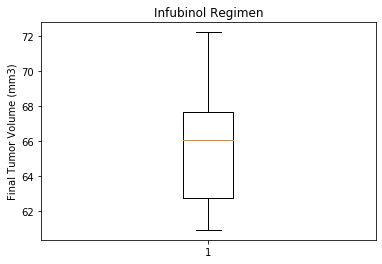

In [67]:
#table
figl, axl = plt.subplots()
axl.set_title("Infubinol Regimen")
axl.set_ylabel('Final Tumor Volume (mm3)')
axl.boxplot(infu_data)
plt.show()

## Line and Scatter Plots

In [68]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomuli
#Capomulin only

capomulin_df = merge_data.loc[merge_data["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df
capomulin_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [69]:
s185_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
s185_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


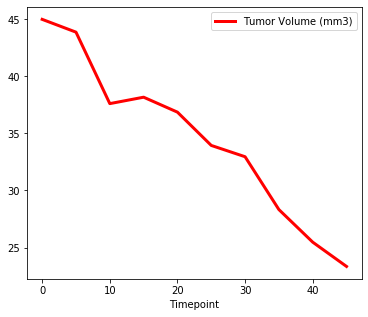

In [73]:
s185_df = s185_df.loc[: , ['Timepoint', "Tumor Volume (mm3)"]]

s185_df.set_index('Timepoint').plot(figsize = (6, 5), linewidth = 3.0, color = 'red')

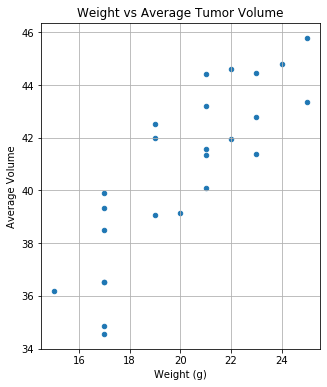

In [86]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

scatter_df = capomulin_df.loc[:,["Mouse ID", 
                                 "Weight (g)", 
                                 "Tumor Volume (mm3)"]]

scatter_df.head()


#avg tumor vol
avg_tumor = pd.DataFrame(scatter_df.groupby(["Mouse ID", "Weight (g)"])
            ["Tumor Volume (mm3)"].mean()).reset_index()
avg_tumor.head()


avg_tumor = avg_tumor.rename(columns={"Tumor Volume (mm3)" : "Average Volume"})




avg_tumor.plot(kind = "scatter", x = "Weight (g)", y = "Average Volume", grid = True, figsize = (5, 6), title = "Weight vs Average Tumor Volume")

plt.show()


## Correlation and Regression

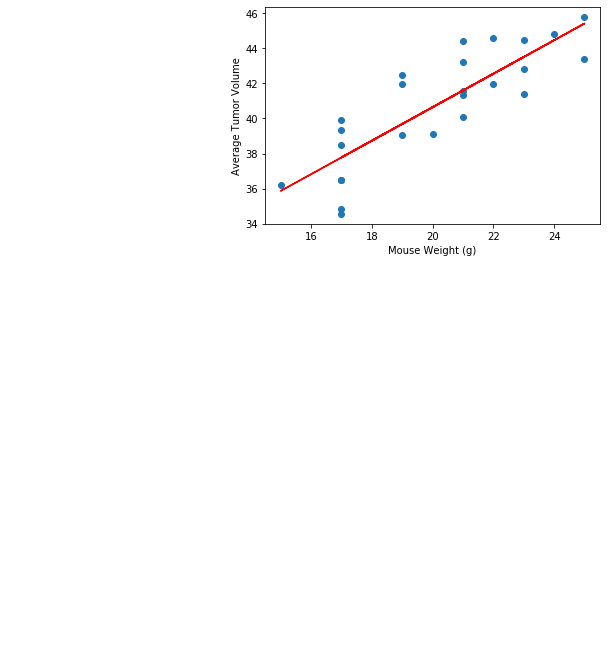

In [95]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = avg_tumor["Weight (g)"]
y_values = avg_tumor["Average Volume"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line, (6,10), fontsize = 12, color = "red")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.show()






